In [1]:
library(GSVA)
library(ggplot2)
library(reshape2)
library(data.table)


Attaching package: 'data.table'

The following objects are masked from 'package:reshape2':

    dcast, melt



In [3]:
expression_matrix = read.table("ac_exp_data.txt",sep="\t",row.names=1,header=T)
#print (head(expression_matrix))

In [8]:
ifn_data = read.table("type1_IFN.txt",sep="\t",row.names=NULL,col.names=c("genes"))
#print (head(ifn_data))
ifn_genes = ifn_data$genes
ifn_genes = as.vector(unlist(ifn_genes))
#print (ifn_genes)
expression_matrix_ifn = expression_matrix[ifn_genes,]
# sanity check
#print (head(expression_matrix_ifn))
print (length(rownames(expression_matrix_ifn)))
expression_matrix_ifn = setDT(expression_matrix_ifn,keep.rownames="Genes")

[1] 25


Warning message in melt.data.table(expression_matrix_ifn):
"To be consistent with reshape2's melt, id.vars and measure.vars are internally guessed when both are 'NULL'. All non-numeric/integer/logical type columns are considered id.vars, which in this case are columns [Genes]. Consider providing at least one of 'id' or 'measure' vars in future."

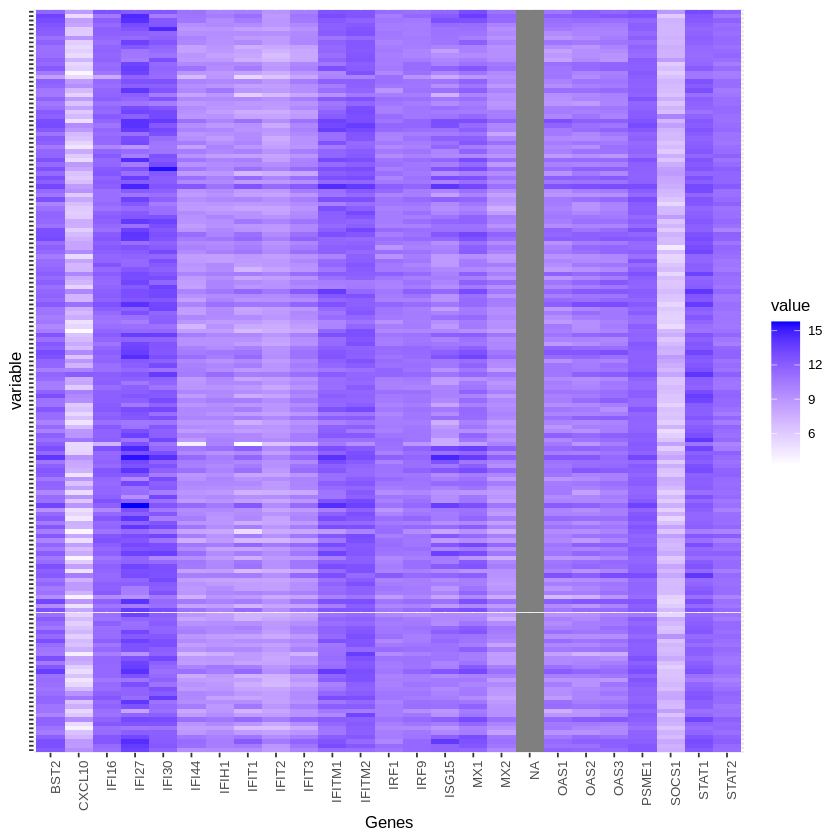

In [10]:
melted_ifn_exp = melt(expression_matrix_ifn)
# plot the heat map to check the expression distribution of the IFN1 signature genes
ggplot(melted_ifn_exp,aes(Genes,variable,fill=value))+geom_tile()+scale_fill_gradient(low="white",high="blue")+theme(text = element_text(size=10),axis.text.x = element_text(angle=90, hjust=1),axis.text.y=element_blank())

In [11]:
# perform gsva

gsva_matrix = gsva(data.matrix(expression_matrix),list(ifn_genes),method="gsva")
gsva_matrix = t(gsva_matrix)

gsva_matrix = as.data.frame(gsva_matrix)
colnames(gsva_matrix)=c("scores")
print (head(gsva_matrix))

Estimating GSVA scores for 1 gene sets.
Computing observed enrichment scores
Estimating ECDFs with Gaussian kernels
Using parallel with 24 cores
  |======================================================================| 100%
                             scores
aab1.Primary.solid.Tumor  0.3843413
aab4.Primary.solid.Tumor  0.6609859
aab6.Primary.solid.Tumor  0.6930486
aab8.Primary.solid.Tumor  0.5446773
aab9.Primary.solid.Tumor -0.5695921
aaba.Primary.solid.Tumor -0.6696803


NULL


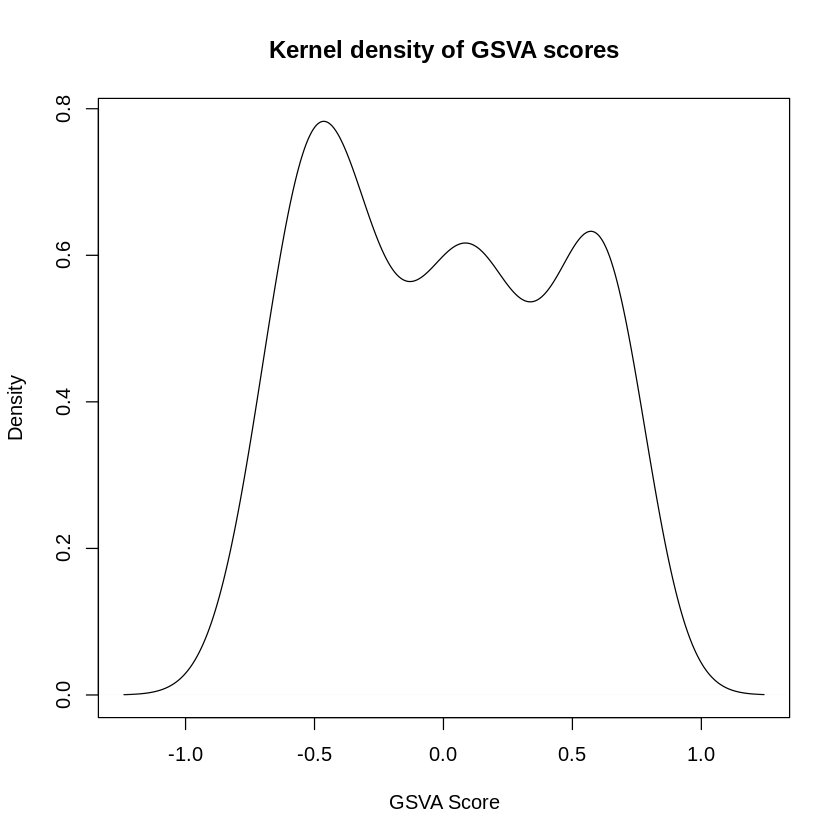

In [13]:
# plot the kernel density plot

density_scores = density(gsva_matrix$scores)
p=plot(density_scores,main="Kernel density of GSVA scores",xlab="GSVA Score")
print (p)